# Neural network to approximate Runge's function

In [1]:
# Imports
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from autograd import grad, elementwise_grad
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import (
    PolynomialFeatures,
)
import json

from functions import runge, OLS_parameters, MSE
from functions import ReLU, ReLU_der, sigmoid, sigmoid_der, softmax, softmax_vec, mse_der
from functions import MSE, identity, identity_der, R2
from nn_class import NeuralNetwork
from functions import leaky_ReLU, leaky_ReLU_der

In [2]:
np.random.seed(42)
n = 1000
# data set from project 1
x = np.linspace(-1,1, n).reshape(-1,1)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

# Save x and y (flattened) to JSON for easy loading later
xy = {"x": x.ravel().tolist(), "y": y.ravel().tolist()}
with open("data/xy.json", "w") as f:
    json.dump(xy, f)
print("Saved x,y to data/xy.json")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_offset = y_train.mean()

poly = PolynomialFeatures(degree=10)
X_train = poly.fit_transform(x_train)
X_test = poly.fit_transform(x_test)
# scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# OLS
beta = OLS_parameters(X_train_s, y_train)
y_test_tilde = X_test_s @ beta + y_offset
y_train_tilde = X_train_s @ beta + y_offset

targets = y_test
print('OLS mse:', MSE(targets, y_test_tilde))
print('OLS R2:', R2(targets, y_test_tilde))

mse_OLS = MSE(targets, y_test_tilde)
R2_OLS = R2(targets, y_test_tilde)

metrics = {"mse": float(mse_OLS), "r2": float(R2_OLS)}
with open("data/ols_metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)

print("Saved OLS metrics to ols_metrics.json")

# Smooth Runge curve and OLS approximation over a fine grid
xx = np.linspace(-1, 1, 400).reshape(-1, 1)
yy = runge(xx)

# Create polynomial features for the grid, scale and predict with OLS beta
XX = poly.transform(xx)
XX_s = scaler.transform(XX)
y_ols = XX_s @ beta + y_offset

plot_data = {"xx": xx.ravel().tolist(), "yy": yy.ravel().tolist(), "y_ols": y_ols.ravel().tolist()}
with open("data/xx_yy_yols.json", "w") as f:
    json.dump(plot_data, f, indent=2)
print("Saved xx, yy, y_ols to data/xx_yy_yols.json")

Saved x,y to data/xy.json
OLS mse: 0.010975094308562099
OLS R2: 0.8471780118216298
Saved OLS metrics to ols_metrics.json
Saved xx, yy, y_ols to data/xx_yy_yols.json


In [3]:
act_funcs = ['sigmoid', 'ReLU','Leaky ReLU']
r2_act = []
mse_act = []

In [4]:
# 1 layer, 50 neurons, different activation functions, stochastic gradient descent, L2
layer_output_sizes = [50, 1]
activation_funcs = [sigmoid] +[identity]
activation_ders = [sigmoid_der] +[identity_der]

scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)
inputs = x_train_s
targets = y_train


NN = NeuralNetwork(
    x_train_s,
    targets,
    layer_output_sizes,
    activation_funcs,
    activation_ders,
    MSE,
    mse_der,
    L2=True,
    lmbda=1e-4
)

NN.train_network_stochastic_gd(lr_method='RMSProp')

targets = y_test

predictions = NN.predict(x_test_s)

mse = MSE(predictions, targets)
r2 = R2(predictions, targets)
print('NN  mse:', mse)
print('NN  R2:', r2)

r2_act.append(r2)
mse_act.append(mse)




NN  mse: 0.009958201487740619
NN  R2: 0.8787142550021529


In [5]:
# 1 layer, 50 neurons, different activation functions, stochastic gradient descent, L2
layer_output_sizes = [50, 1]
activation_funcs = [ReLU] +[identity]
activation_ders = [ReLU_der] +[identity_der]

scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)
inputs = x_train_s
targets = y_train


NN = NeuralNetwork(
    x_train_s,
    targets,
    layer_output_sizes,
    activation_funcs,
    activation_ders,
    MSE,
    mse_der,
    L2=True,
    lmbda=1e-4
)

NN.train_network_stochastic_gd(lr_method='RMSProp')

targets = y_test

predictions = NN.predict(x_test_s)

mse = MSE(predictions, targets)
r2 = R2(predictions, targets)
print('NN  mse:', mse)
print('NN  R2:', r2)

r2_act.append(r2)
mse_act.append(mse)

NN  mse: 0.0160541252001532
NN  R2: 0.8127093633161453


In [6]:
# 1 layer, 50 neurons, different activation functions, stochastic gradient descent, L2
layer_output_sizes = [50, 1]
activation_funcs = [leaky_ReLU] +[identity]
activation_ders = [leaky_ReLU_der] +[identity_der]

scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)
inputs = x_train_s
targets = y_train


NN = NeuralNetwork(
    x_train_s,
    targets,
    layer_output_sizes,
    activation_funcs,
    activation_ders,
    MSE,
    mse_der,
    L2=True,
    lmbda=1e-4
)

NN.train_network_stochastic_gd(lr_method='RMSProp')

targets = y_test

predictions = NN.predict(x_test_s)

mse = MSE(predictions, targets)
r2 = R2(predictions, targets)
print('NN  mse:', mse)
print('NN  R2:', r2)

r2_act.append(r2)
mse_act.append(mse)

NN  mse: 0.011311825925102412
NN  R2: 0.8635332221294724


In [7]:
print('r2', r2_act)
print('mse', mse_act)


r2 [np.float64(0.8787142550021529), np.float64(0.8127093633161453), np.float64(0.8635332221294724)]
mse [np.float64(0.009958201487740619), np.float64(0.0160541252001532), np.float64(0.011311825925102412)]


/var/folders/97/_7kk5frs11nd2xh84yf4d9nw0000gp/T/ipykernel_52374/641680448.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


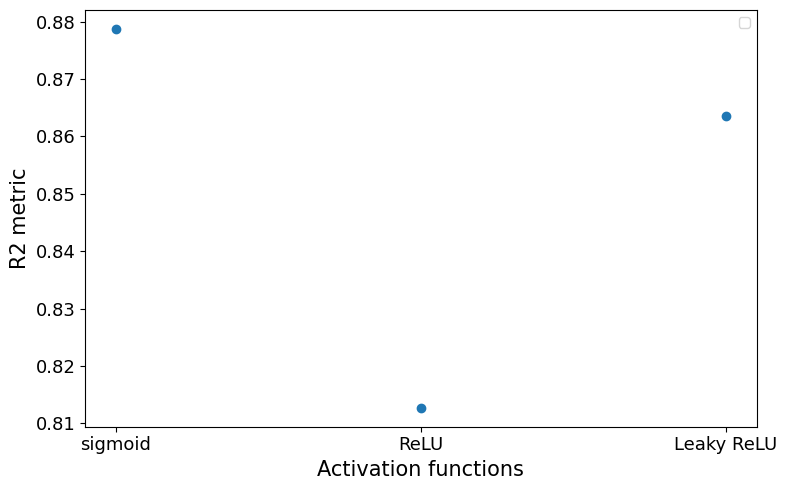

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(act_funcs, r2_act, 'o')

ax.set_xlabel("Activation functions", fontsize=15)
ax.set_ylabel("R2 metric", fontsize=15)

ax.tick_params(axis="both", labelsize=13)
ax.legend()
fig.tight_layout()
fig.savefig("../Figures/runge_activation_functions.png", dpi=300, bbox_inches="tight")
plt.show()